In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


In [2]:
deliveries=pd.read_csv("deliveries.csv")

In [3]:
prod=pd.read_csv("products.csv")

In [4]:
ord_items=pd.read_csv("order_items.csv")

In [5]:
orde=pd.read_csv("orders.csv")

In [6]:
df_half=pd.merge(deliveries,ord_items)

In [7]:
df=pd.merge(df_half,orde)

In [8]:
df["order_placed_at"]=pd.to_datetime(df["order_placed_at"])

In [9]:
df.head(10)

,order_id,time_stamp,status,items_ordered,order_placed_at
0,321230114,2020-12-11 00:01:29.000000000,Pending,"['p_025', 'p_032', 'p_037']",2020-12-11 00:01:29
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,"['p_025', 'p_032', 'p_037']",2020-12-11 00:01:29
2,321230114,2020-12-11 00:19:13.299151076,Delivered,"['p_025', 'p_032', 'p_037']",2020-12-11 00:01:29
3,321230115,2020-12-11 00:36:02.000000000,Pending,"['p_017', 'p_012']",2020-12-11 00:36:02
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,"['p_017', 'p_012']",2020-12-11 00:36:02
5,321230115,2020-12-11 00:59:18.054846609,Delivered,"['p_017', 'p_012']",2020-12-11 00:36:02
6,321230116,2020-12-11 00:55:01.000000000,Pending,"['p_027', 'p_037']",2020-12-11 00:55:01
7,321230116,2020-12-11 01:00:01.000000000,Out For Delivery,"['p_027', 'p_037']",2020-12-11 00:55:01
8,321230116,2020-12-11 01:13:52.153042625,Delivered,"['p_027', 'p_037']",2020-12-11 00:55:01
9,321230117,2020-12-11 01:05:27.000000000,Pending,"['p_004', 'p_029']",2020-12-11 01:05:27


In [14]:
df['delivery_time'] = df['time_stamp'] - df['order_placed_at']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363008 entries, 0 to 1363007
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   order_id         1363008 non-null  int64         
 1   time_stamp       1363008 non-null  datetime64[ns]
 2   status           1363008 non-null  object        
 3   items_ordered    1363008 non-null  object        
 4   order_placed_at  1363008 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 62.4+ MB


In [12]:
df["time_stamp"]=pd.to_datetime(df["time_stamp"])

In [15]:
df.head(5)

,order_id,time_stamp,status,items_ordered,order_placed_at,delivery_time
0,321230114,2020-12-11 00:01:29.000000000,Pending,"['p_025', 'p_032', 'p_037']",2020-12-11 00:01:29,0 days 00:00:00
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,"['p_025', 'p_032', 'p_037']",2020-12-11 00:01:29,0 days 00:05:00
2,321230114,2020-12-11 00:19:13.299151076,Delivered,"['p_025', 'p_032', 'p_037']",2020-12-11 00:01:29,0 days 00:17:44.299151076
3,321230115,2020-12-11 00:36:02.000000000,Pending,"['p_017', 'p_012']",2020-12-11 00:36:02,0 days 00:00:00
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,"['p_017', 'p_012']",2020-12-11 00:36:02,0 days 00:05:00


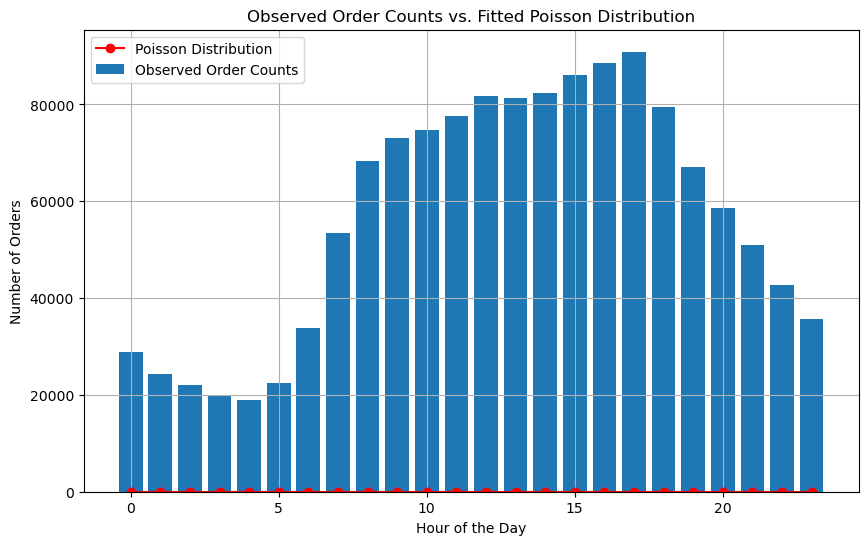

In [17]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
df['hour'] = df['time_stamp'].dt.hour
order_counts = df['hour'].value_counts().sort_index()
mu = order_counts.mean() 
poisson_dist = poisson(mu)
plt.figure(figsize=(10, 6))
plt.bar(order_counts.index, order_counts.values, label='Observed Order Counts')
plt.plot(order_counts.index, poisson_dist.pmf(order_counts.index), 'ro-', label='Poisson Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Observed Order Counts vs. Fitted Poisson Distribution')
plt.legend()
plt.grid(True)
plt.show()
mu = order_counts.mean()  
poisson_dist = poisson(mu)


## Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved?

### 1.Possion Distribution can be used to model the number of orders incoming each hour

### 2.Once we model the Possion distribution by using it we can know the number of possible orders incoming each hour

### 3.By using the information of number of possible incoming orders each hour the owner of Pizza store can arrange or hire the workers based on the incoming orders

### 4.If suppose let us assume that in Pizza store if we are got to known that in coming next five hours we are going get high no.of. incoming orders
###   then owner can hire more delivery persons than the regular persons so that the orders can be delivered as soon as possible

### 5.By which all the orders can be delivered within time so that they are not need to pay refund for pizza

### 6.By using possion dist if we know that for next few hours the incoming orders are going to be very less then the owner can hire only few delivery persons

## So by using Possion Distribution the no.of. delivery persons to be hired for that particular hour so that pizza's can be delivered on time.
## and he can also reduce the no.of. delivery persons during low orders



## So that the owner can gain profits

### So by using the possion dist the owner can decide the no.of. delivery persons to be hired